## Introduction

The objectives of this notebook are:  
1. Understanding data manipulation in Pandas.
2. Learning the internal working of matplotlib library.
3. Understanding Standard Deviation, Variance through examples.
4. Visualizing all statistical features like Z-scores etc.
5. Feature transformation:
       a. Standardization
       b. Normalization
       c. Log Transformations

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import palmerpenguins as pp
from sklearn.preprocessing import StandardScaler
##to see the package details
#!pip show palmerpenguins

In [2]:
#set the display format of float numbers 
#used to override the scientific notation.
pd.options.display.float_format = '{:.3f}'.format

In [3]:
#checking what all present in palmerpenguins library.
dir(pp)

['__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'load_penguins',
 'load_penguins_raw',
 'penguins']

In [4]:
#load the dataset
penguin_data = pp.load_penguins()

In [5]:
penguin_data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.100,18.700,181.000,3750.000,male,2007
1,Adelie,Torgersen,39.500,17.400,186.000,3800.000,female,2007
2,Adelie,Torgersen,40.300,18.000,195.000,3250.000,female,2007


In [6]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [7]:
#check for duplicate rows--None
penguin_data.duplicated().sum()

np.int64(0)

In [8]:
#check number of missing values in each column
penguin_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
#see all rows where at least 1 missing value present.
penguin_data[penguin_data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.100,18.100,193.000,3475.000,NaN,2007
9,Adelie,Torgersen,42.000,20.200,190.000,4250.000,NaN,2007
10,Adelie,Torgersen,37.800,17.100,186.000,3300.000,NaN,2007
11,Adelie,Torgersen,37.800,17.300,180.000,3700.000,NaN,2007
47,Adelie,Dream,37.500,18.900,179.000,2975.000,NaN,2007
178,Gentoo,Biscoe,44.500,14.300,216.000,4100.000,NaN,2007
218,Gentoo,Biscoe,46.200,14.400,214.000,4650.000,NaN,2008
256,Gentoo,Biscoe,47.300,13.800,216.000,4725.000,NaN,2009
268,Gentoo,Biscoe,44.500,15.700,217.000,4875.000,NaN,2009


In [10]:
#drop all NA values
penguin_data.dropna(inplace = True)

In [11]:
#make a copy of dataframe for further manipulation
data2 = penguin_data.copy()

In [12]:
#check for all unique values in 'species', 'island', 'sex' and 'year'
categorical_columns = data2.select_dtypes(exclude = "float").columns.tolist()
categorical_columns

['species', 'island', 'sex', 'year']

In [13]:
#View all unique values in these columns
for i in categorical_columns:
    unique_categories = data2[i].unique()
    print(i, ": ", unique_categories)

species :  ['Adelie' 'Gentoo' 'Chinstrap']
island :  ['Torgersen' 'Biscoe' 'Dream']
sex :  ['male' 'female']
year :  [2007 2008 2009]


In [14]:
#Statistical summary of numeric columns
data2.drop(columns = ['year']).describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000,333.000,333.000,333.000
mean,43.993,17.165,200.967,4207.057
std,5.469,1.969,14.016,805.216
min,32.100,13.100,172.000,2700.000
25%,39.500,15.600,190.000,3550.000
50%,44.500,17.300,197.000,4050.000
75%,48.600,18.700,213.000,4775.000
max,59.600,21.500,231.000,6300.000


### Standardize the numerical features

1. StandardScaler() is sensitive to outliers. So, it is essential to remove outliers before.
   It computes the Z-score using mean and standard-deviation.
   And mean is affected by outliers.

In [15]:
#Scale all numerical features.
scaler = StandardScaler()

In [16]:
#To see all the functions present in scaler
#dir(scaler)

In [17]:
#take only float features
float_features = data2.select_dtypes(include = "float").columns
float_features

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [18]:
#transform the featuers.
data2[float_features] = scaler.fit_transform(data2[float_features])

In [19]:
#check Summary stats now
data2[float_features].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000,333.000,333.000,333.000
mean,-0.000,-0.000,0.000,-0.000
std,1.002,1.002,1.002,1.002
min,-2.178,-2.067,-2.070,-1.874
25%,-0.823,-0.796,-0.784,-0.817
50%,0.093,0.069,-0.283,-0.195
75%,0.844,0.781,0.860,0.706
max,2.858,2.205,2.146,2.603


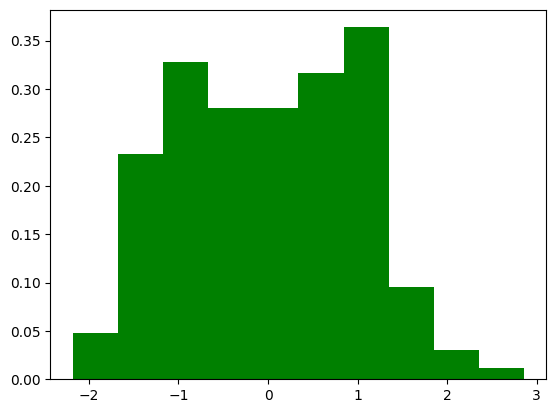

In [23]:
# Distribution plot for original penguins data and the standardized one.
plt.hist(data2.bill_length_mm, density = True, color = 'g', bins = 10)
plt.show()

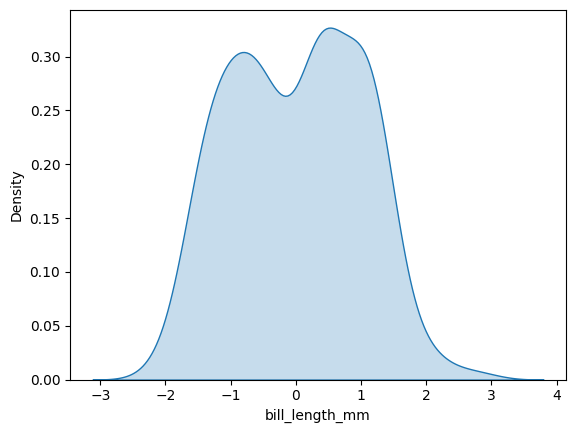

In [29]:
sns.kdeplot(data2.bill_length_mm, fill = True)
plt.show()

In [32]:
data2.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

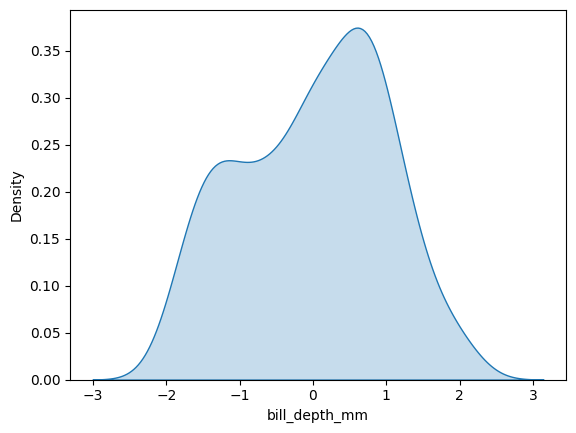

In [35]:
sns.kdeplot(data2.bill_depth_mm, fill = True)
plt.show()

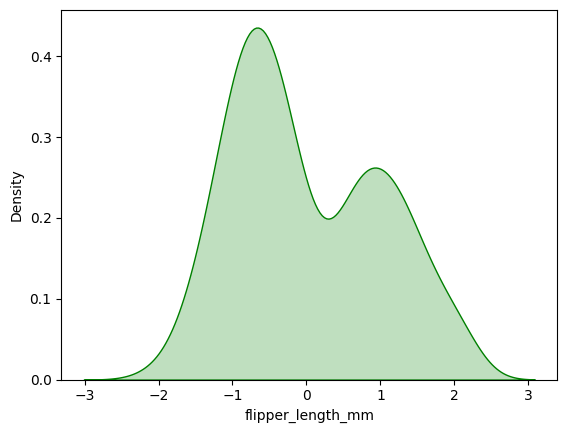

In [37]:
sns.kdeplot(data2.flipper_length_mm, fill = True, color = 'g')
plt.show()

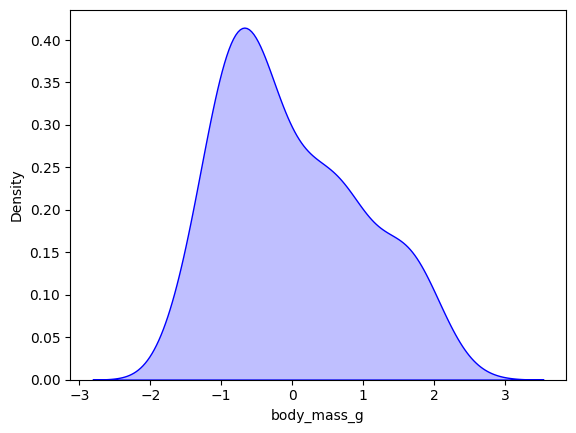

In [40]:
sns.kdeplot(data2.body_mass_g, fill = True, color = 'b')
plt.show()

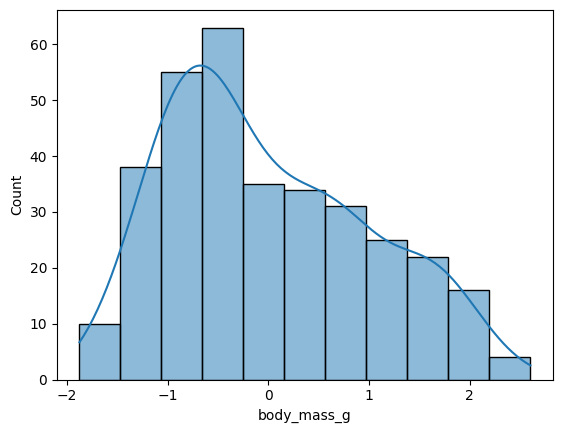

In [43]:
sns.histplot(data2.body_mass_g, kde = True, fill = True)
plt.show()